           LOCATION    TOTAL
0           England  16058.0
1  Northern Ireland   6564.0
2          Scotland  10538.0
3             Wales   9881.0


<ipython-input-10-fc0a84652544>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TOTAL'] = pd.to_numeric(df_filtered['TOTAL'], errors='coerce')


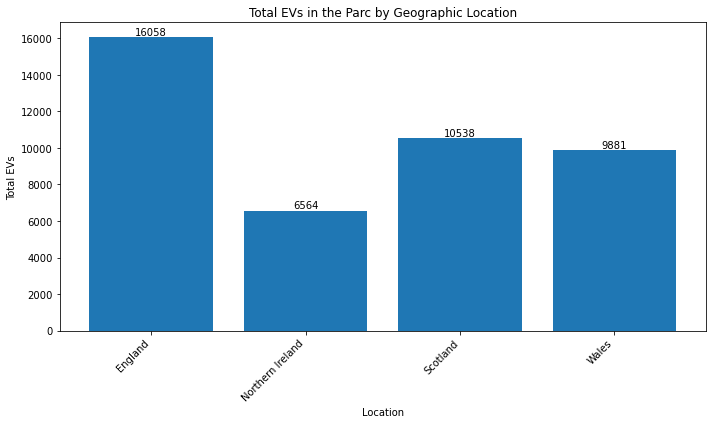

In [10]:
######## 1_2 Distribution of EVs in the Parc by Geographic Location ########

import pandas as pd
import matplotlib.pyplot as plt
# Assuming your DataFrame is named 'df'

# Read the CSV file into a DataFrame, skipping the first 4 rows
csv_url = r'C:\Users\varun\OneDrive - Maynooth University\0_BCP\New Files\VEH0171a_Fuel.csv'
df = pd.read_csv(csv_url, skiprows=4)

# Renaming the columns and removing extra spaces
df = df.rename(columns={
    'Geography [note 3]': 'LOCATION',
    'Date Interval [note 4]': 'INTERVAL',
    'Date [note 4]': 'DATE',
    'Total'  : 'TOTAL'  # Replace 'old_column_name_n' with the actual last column name
})

# Keep only the desired columns
columns_to_keep = ['LOCATION', 'INTERVAL', 'DATE', 'TOTAL']
df = df[columns_to_keep]

# Now your DataFrame has the desired column names and only the desired columns
# print(df.head())

# Filter for annual intervals
df_annual = df[df['INTERVAL'] == 'Annual']

# List of locations to consider
locations_list = ['England', 'Scotland', 'Wales', 'Northern Ireland']

# Filter the DataFrame to include only the listed locations
df_filtered = df_annual[df_annual['LOCATION'].isin(locations_list)]

# Convert 'TOTAL' column to numeric
df_filtered['TOTAL'] = pd.to_numeric(df_filtered['TOTAL'], errors='coerce')

# Group by location and sum the values of the 'TOTAL' column for each location
grouped_df = df_filtered.groupby('LOCATION')['TOTAL'].sum().reset_index()

print(grouped_df)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_df['LOCATION'], grouped_df['TOTAL'])
plt.xlabel('Location')
plt.ylabel('Total EVs')
plt.title('Total EVs in the Parc by Geographic Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add annotations for each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

# Show the plot
plt.show()